In [2]:
%load_ext autoreload
%aimport tensor_toolbox
%autoreload 1

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Listing 5.1: Adding white-noise channels or all-zeros channels to MNIST**

==================== image with noise | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (60000, 1568) | nDims: 2 | dtype: float64
image with noise[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
... (showing only the first 20 elements)

==================== image with 0s | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (60000, 1568) | nDims: 2 | dtype: float64
image with 0s[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
... (showing only the first 20 elements)

==================== image with noise | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (56, 28) | nDims: 2 | dtype: float64
image with noise[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
... (showing only the first 20 elements)


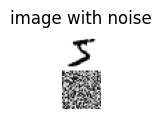


==================== image with 0s | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (56, 28) | nDims: 2 | dtype: float64
image with 0s[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
... (showing only the first 20 elements)


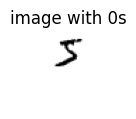

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

tensor_toolbox.tensor_info(train_images_with_noise_channels, "image with noise", image=False)
tensor_toolbox.tensor_info(train_images_with_zeros_channels, "image with 0s", image=False)

# Let's pick a sample of each and display them
image_with_noise = train_images_with_noise_channels[0]
image_with_zeros = train_images_with_zeros_channels[0]
image_with_noise = image_with_noise.reshape((-1, 28))
image_with_zeros = image_with_zeros.reshape((-1, 28))
tensor_toolbox.tensor_info(image_with_noise, "image with noise", image=True)
tensor_toolbox.tensor_info(image_with_zeros, "image with 0s", image=True)

**Listing 5.2: Training the same model on MNIST data with noise channels or all-zero channels**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tqdm.keras import TqdmCallback

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[TqdmCallback()],
    verbose=0)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[TqdmCallback()],
    verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**Listing 5.3: Plotting a validation accuracy comparison**

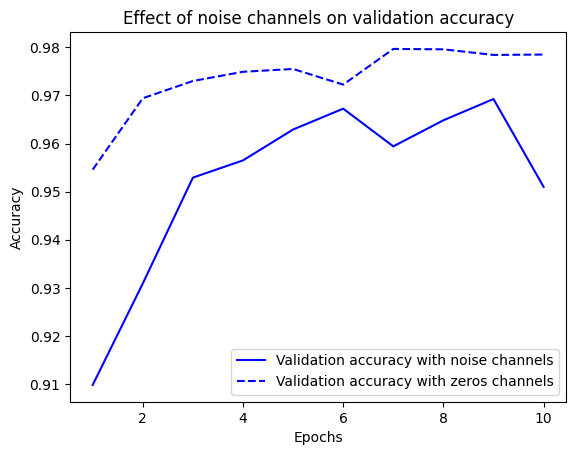

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Listing 5.4: Fitting a MNIST model with randomly shuffled labels**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2,
          callbacks=[TqdmCallback()],
          verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [14]:
from tqdm.keras import TqdmCallback
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.legacy.RMSprop(1.), # For Apple Silicon macs
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2,
          callbacks=[TqdmCallback()],
            verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**The same model with a more appropriate learning rate**

In [15]:
from tqdm.keras import TqdmCallback

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.legacy.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2,
          callbacks=[TqdmCallback()],
            verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [19]:
from tqdm.keras import TqdmCallback
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[TqdmCallback()],
    verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

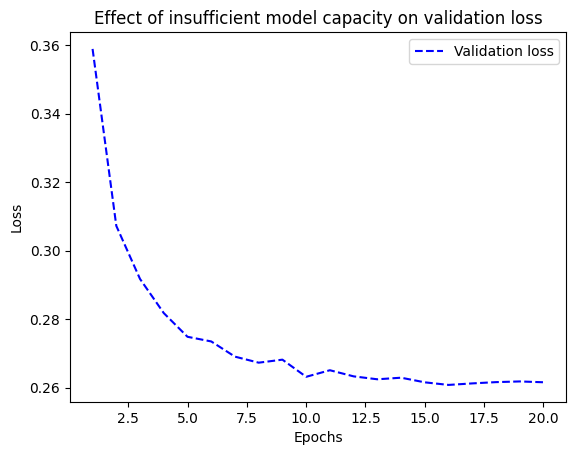

In [20]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [21]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[TqdmCallback()],
    verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [22]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4,
                             callbacks=[TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**Version of the model with lower capacity**

In [23]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,
    callbacks=[TqdmCallback()], verbose=0)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**Version of the model with higher capacity**

In [24]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,
    callbacks=[TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [26]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,
    callbacks=[TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [29]:
# In PyTorch, l2 regularization is applied directly to the optimizer, like:
import torch
class TorchModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.dense1 = torch.nn.Linear(16, 16)
        self.dense2 = torch.nn.Linear(16, 1)
    def forward(self, x):
        x = torch.relu(self.dense1(x))
        return torch.sigmoid(self.dense2(x))
model = TorchModel()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay=0.002)


**Different weight regularizers available in Keras**

In [27]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,
    callbacks=[TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

## Summary